## Importing Libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
import warnings
warnings.simplefilter('ignore')

## Reading the Data

In [159]:
df = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')

In [160]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [161]:
df.columns=['Age', 'Gender', 'Height', 'Weight', 'Alc_Consumption', 'High_Cal_Intake', 'Veg_Consumption', 'Meals_Count_per_day',
       'Cal_Intake', 'Smoke', 'Water_Consumption', 'family_with_OverWgt', 'Exercise', 'Tech_Usage',
       'Food_b/w_Meals', 'Transport_Usage', 'Obesity_level']

### To see how many null values are there

In [162]:
df.isnull().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
Alc_Consumption        0
High_Cal_Intake        0
Veg_Consumption        0
Meals_Count_per_day    0
Cal_Intake             0
Smoke                  0
Water_Consumption      0
family_with_OverWgt    0
Exercise               0
Tech_Usage             0
Food_b/w_Meals         0
Transport_Usage        0
Obesity_level          0
dtype: int64

### To check the shape of the data

In [163]:
df.shape

(2111, 17)

In [164]:
df.duplicated().value_counts()

False    2087
True       24
Name: count, dtype: int64

In [165]:
df.shape

(2111, 17)

In [166]:
df.describe()

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [167]:
df.describe(include='O')

,Gender,Alc_Consumption,High_Cal_Intake,Cal_Intake,Smoke,family_with_OverWgt,Food_b/w_Meals,Transport_Usage,Obesity_level
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [168]:
df.corr(numeric_only = True)

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
Veg_Consumption,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
Meals_Count_per_day,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
Water_Consumption,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
Exercise,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
Tech_Usage,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [169]:
cat_col= df.select_dtypes(include='O')
cat_col

,Gender,Alc_Consumption,High_Cal_Intake,Cal_Intake,Smoke,family_with_OverWgt,Food_b/w_Meals,Transport_Usage,Obesity_level
0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_III


In [170]:
num_col = df.select_dtypes(include = 'number')
num_col

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [171]:
# df.columns=['Age', 'Gender', 'Height', 'Weight', 'Alc_Cons', 'High_Cal_Intake', 'Veg_Cons', 'Meals_Count',
#        'Cal_Intake', 'SMOKE', 'Water_cons', 'family_with_OverWgt', 'Exercise', 'Tech_Usage',
#        'Food_b/w_Meals', 'Transport_Usage', 'Obesity_level']

## Finding Co-relation between the columns that which are only in numerics

<Axes: >

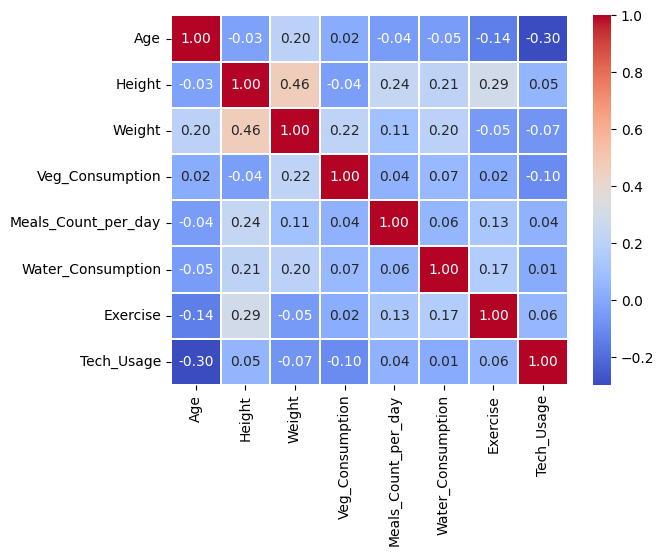

In [172]:
sns.heatmap(df.corr(numeric_only = True), linewidth = .1, fmt= '.2f',annot = True, cmap='coolwarm')

In [173]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Alc_Consumption',
       'High_Cal_Intake', 'Veg_Consumption', 'Meals_Count_per_day',
       'Cal_Intake', 'Smoke', 'Water_Consumption', 'family_with_OverWgt',
       'Exercise', 'Tech_Usage', 'Food_b/w_Meals', 'Transport_Usage',
       'Obesity_level'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2111 non-null   float64
 1   Gender               2111 non-null   object 
 2   Height               2111 non-null   float64
 3   Weight               2111 non-null   float64
 4   Alc_Consumption      2111 non-null   object 
 5   High_Cal_Intake      2111 non-null   object 
 6   Veg_Consumption      2111 non-null   float64
 7   Meals_Count_per_day  2111 non-null   float64
 8   Cal_Intake           2111 non-null   object 
 9   Smoke                2111 non-null   object 
 10  Water_Consumption    2111 non-null   float64
 11  family_with_OverWgt  2111 non-null   object 
 12  Exercise             2111 non-null   float64
 13  Tech_Usage           2111 non-null   float64
 14  Food_b/w_Meals       2111 non-null   object 
 15  Transport_Usage      2111 non-null   o

In [175]:
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [176]:
df['Alc_Consumption'].value_counts()

Alc_Consumption
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [177]:
df['High_Cal_Intake'].value_counts()

High_Cal_Intake
yes    1866
no      245
Name: count, dtype: int64

In [178]:
df['Veg_Consumption'].value_counts()

Veg_Consumption
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

In [179]:
df['Cal_Intake'].value_counts()

Cal_Intake
no     2015
yes      96
Name: count, dtype: int64

In [180]:
df['Smoke'].value_counts()

Smoke
no     2067
yes      44
Name: count, dtype: int64

In [181]:
df['family_with_OverWgt'].value_counts()

family_with_OverWgt
yes    1726
no      385
Name: count, dtype: int64

In [182]:
df['Food_b/w_Meals'].value_counts()

Food_b/w_Meals
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [183]:
df['Transport_Usage'].value_counts()

Transport_Usage
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [184]:
df['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [185]:
df['Age'].value_counts()

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

In [186]:
# a = df['Age']
# a

In [187]:
# sorted(a)

In [188]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Alc_Consumption',
       'High_Cal_Intake', 'Veg_Consumption', 'Meals_Count_per_day',
       'Cal_Intake', 'Smoke', 'Water_Consumption', 'family_with_OverWgt',
       'Exercise', 'Tech_Usage', 'Food_b/w_Meals', 'Transport_Usage',
       'Obesity_level'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

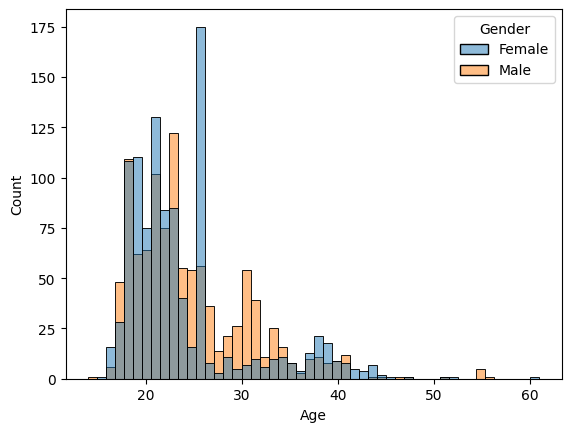

In [189]:
sns.histplot(x='Age',data = df,hue = 'Gender')

<Axes: xlabel='Age', ylabel='Count'>

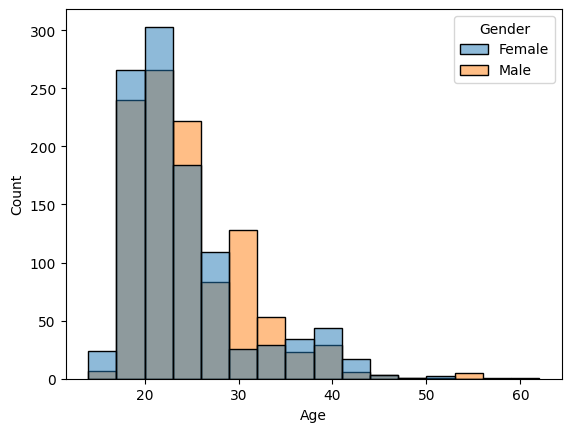

In [190]:
sns.histplot(data=df,x="Age",binwidth=3,hue="Gender")

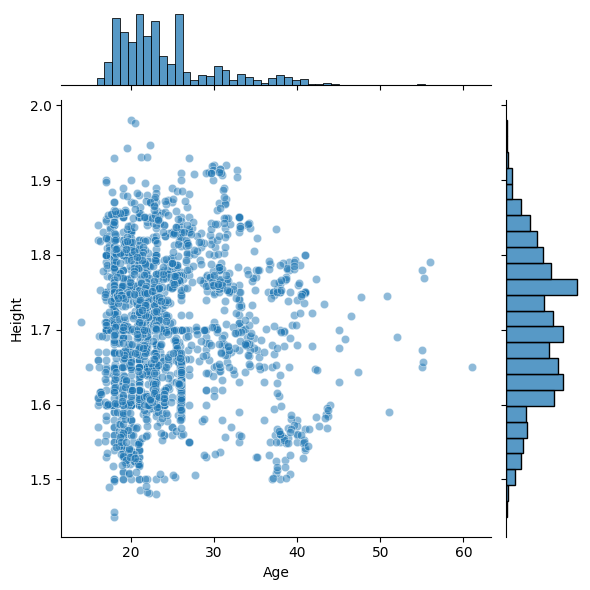

In [191]:
figsize=(15,30)
sns.jointplot(x='Age', y='Height', data=df, kind='scatter',alpha = 0.5)
plt.show()

In [192]:
# Group the data by 'Alcohol_Frequency' and 'Obesity_level', and calculate the mean weight
grouped_data = df.groupby(['Alc_Consumption', 'Obesity_level'])['Weight'].mean().reset_index()

# Pivot the data to make 'Alcohol_Frequency' the index and 'Obesity_level' the columns
pivot_data = grouped_data.pivot(index='Alc_Consumption', columns='Obesity_level', values='Weight')


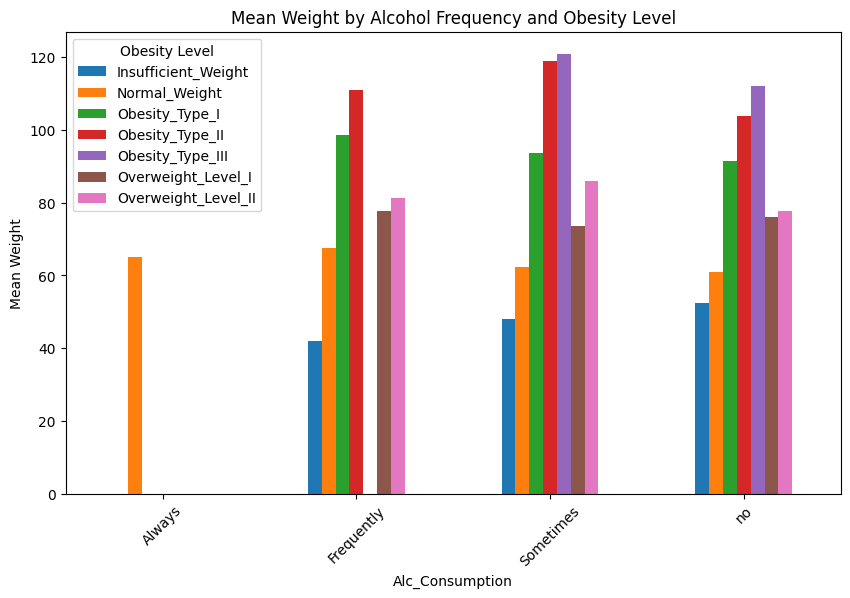

In [193]:
# Plot the data
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Weight by Alcohol Frequency and Obesity Level')
plt.xlabel('Alc_Consumption')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level')

<Axes: xlabel='Gender', ylabel='count'>

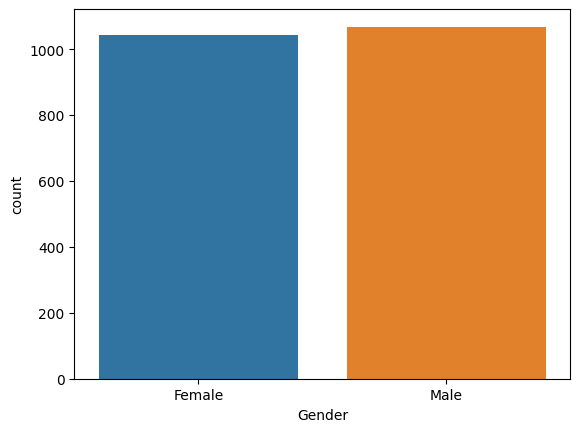

In [194]:
sns.countplot(x='Gender', data = df)

<Axes: xlabel='Height', ylabel='Count'>

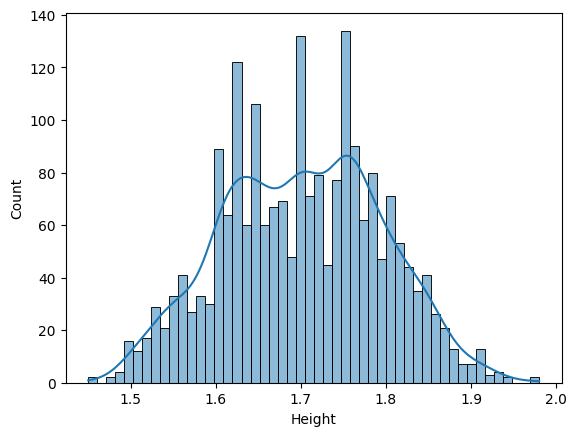

In [195]:
sns.histplot(x='Height',kde = True, bins = 50,data = df)

<Axes: xlabel='Weight', ylabel='Count'>

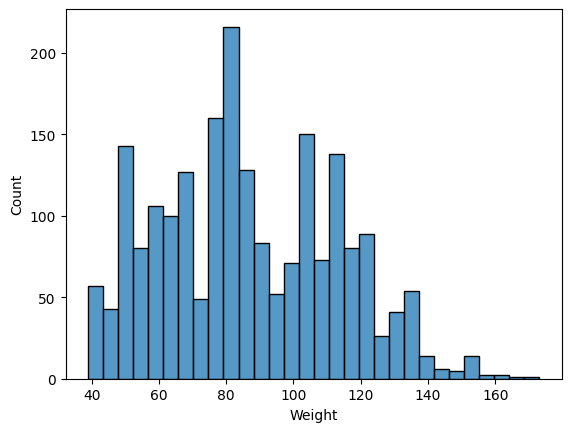

In [196]:
sns.histplot(x='Weight',bins = 30,data = df)

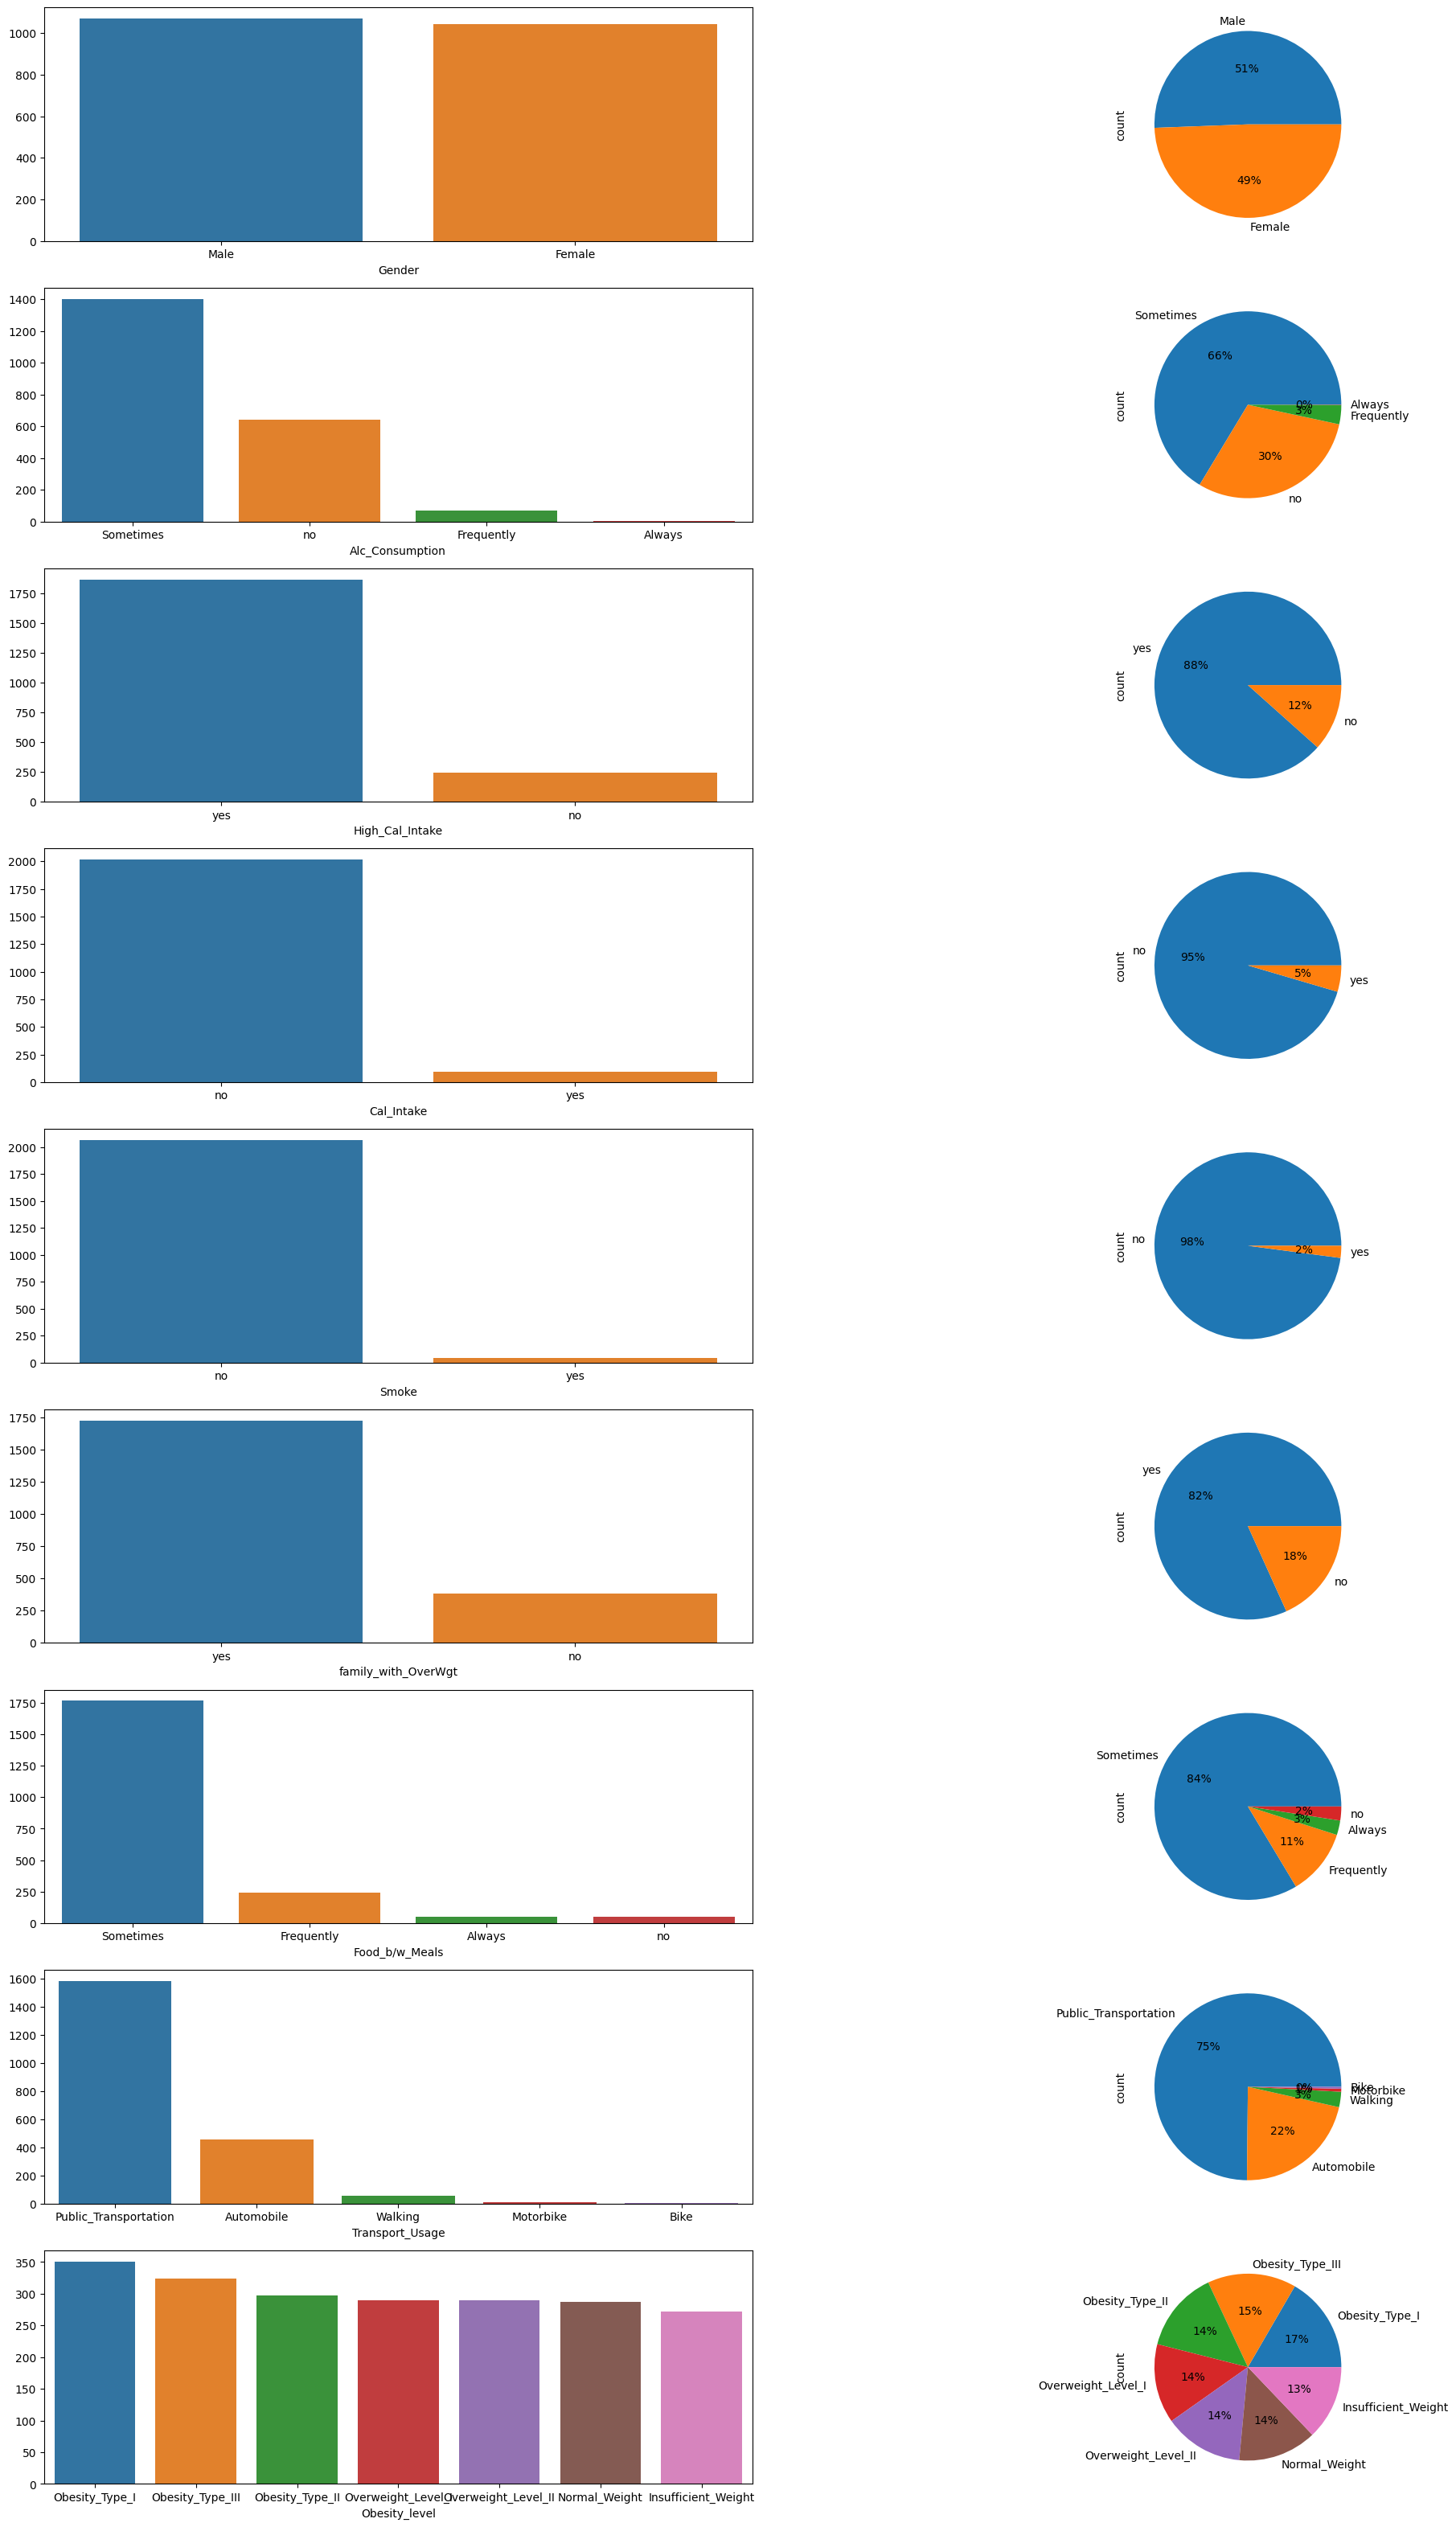

In [197]:
figure,axes = plt.subplots(9,2,figsize = (25,40))
i = 0
for col in cat_col:
    index = df[col].value_counts().index
    value = df[col].value_counts().values
    sns.barplot(x=index,y=value,ax=axes[i][0])
    df[col].value_counts().plot(kind='pie',autopct='%0.00f%%',ax=axes[i][1])
    i = i+1

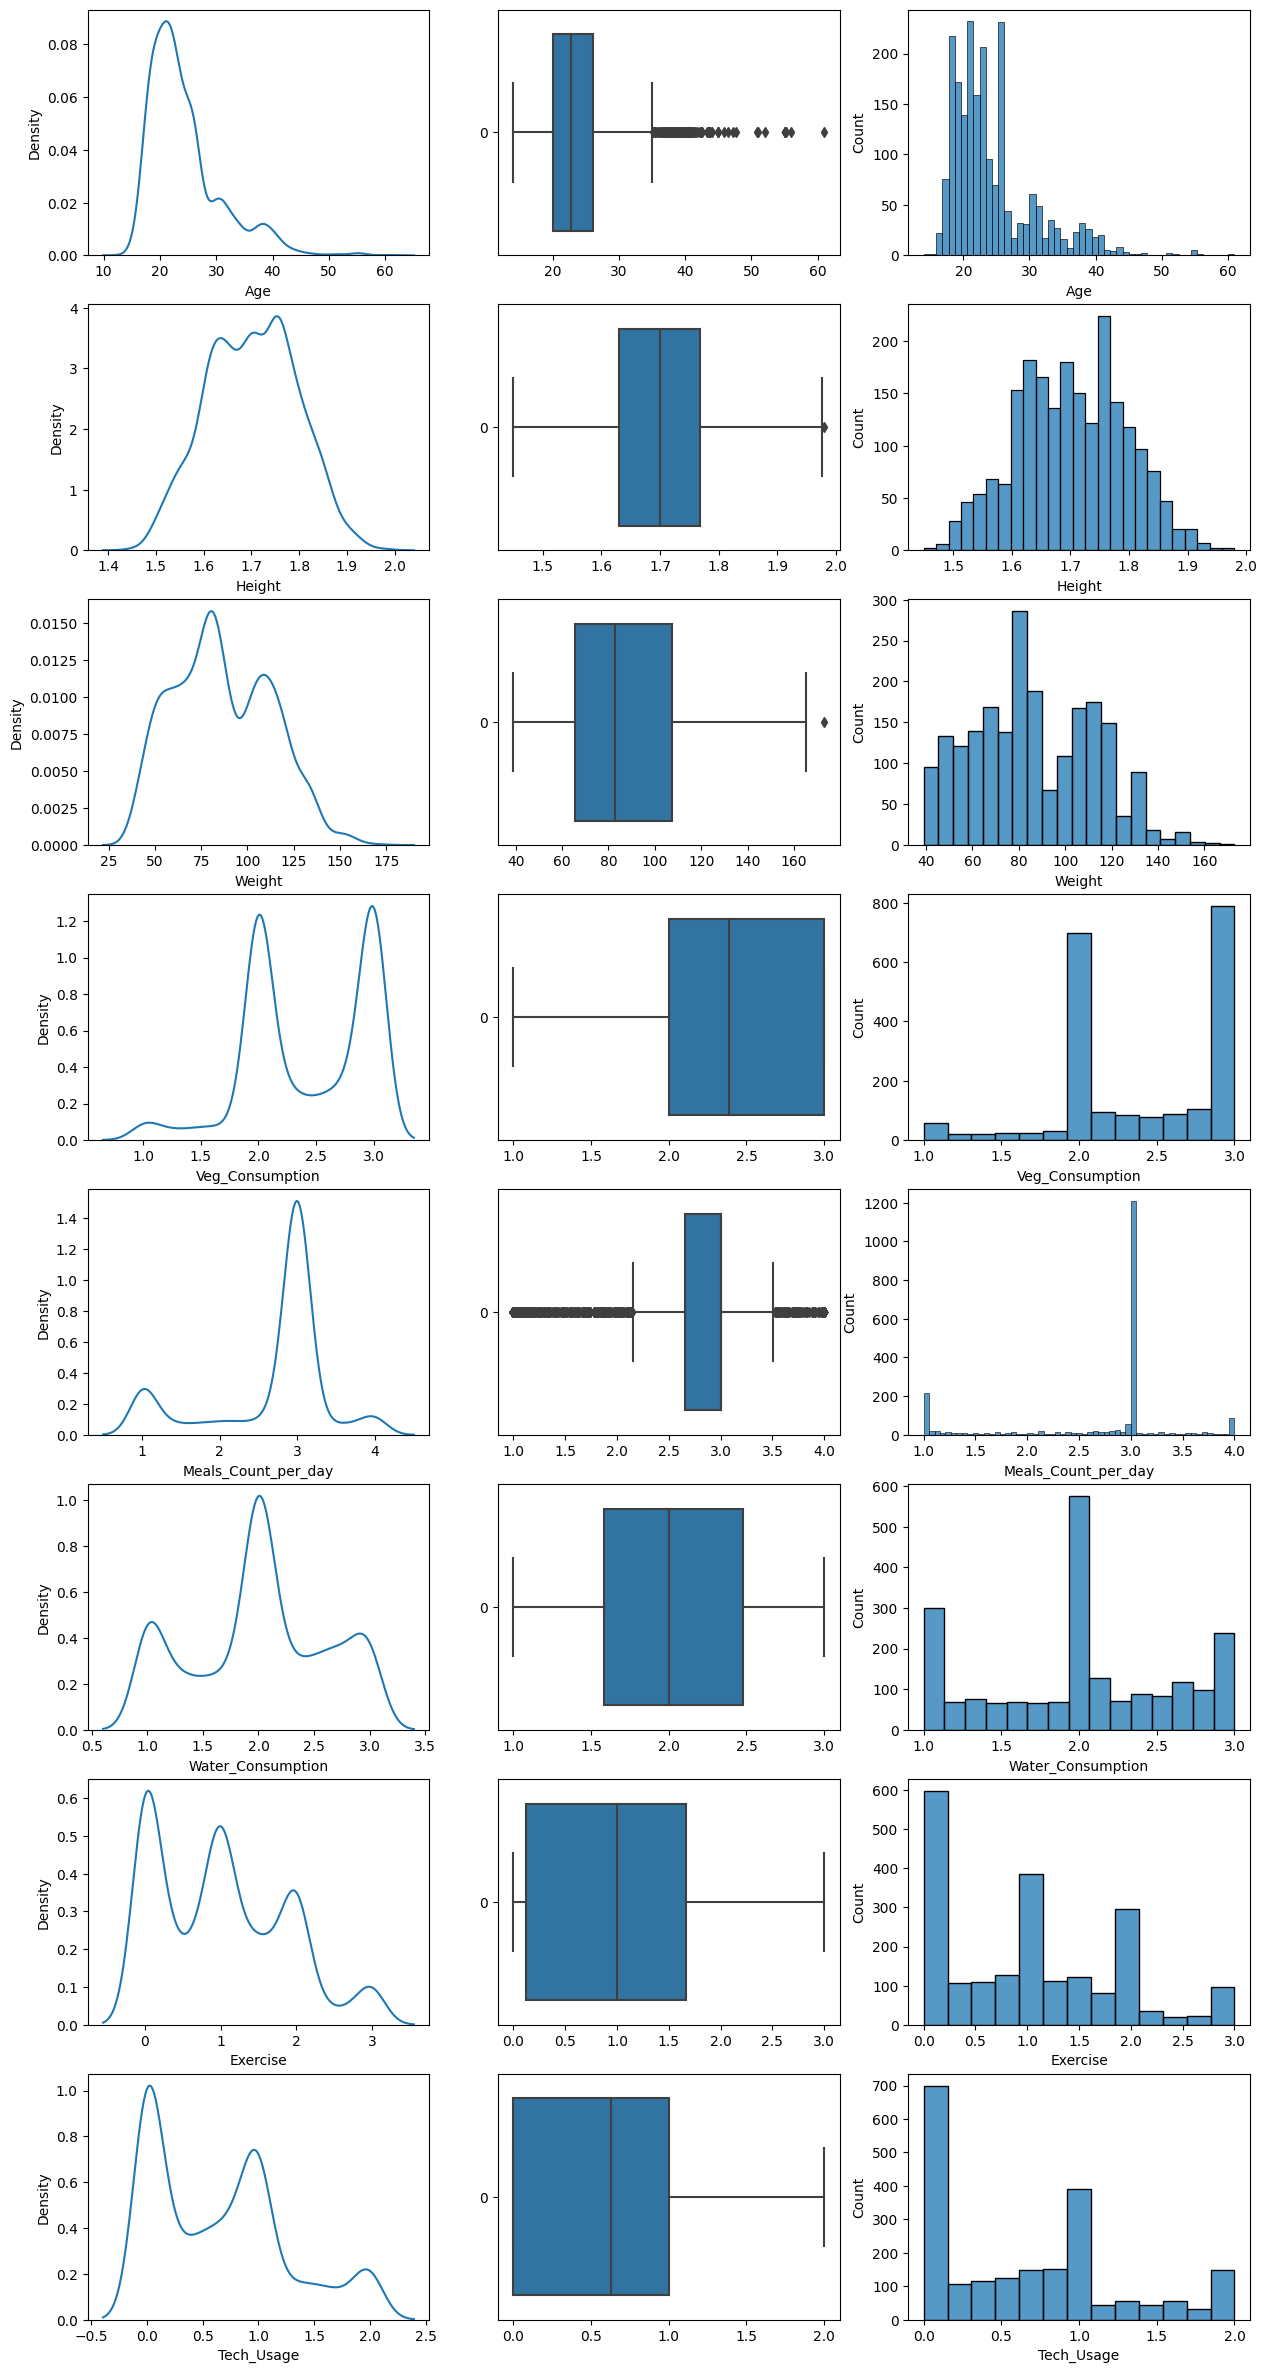

In [198]:
figure,axes = plt.subplots(8,3,figsize=(15,30))
i = 0
for num in num_col:
    sns.distplot(df[num],hist=False,ax= axes[i][0])
    sns.boxplot(df[num],orient = 'h',ax= axes[i][1])
    sns.histplot(df[num],ax = axes[i][2])
    i=i+1

<Axes: xlabel='Alc_Consumption', ylabel='count'>

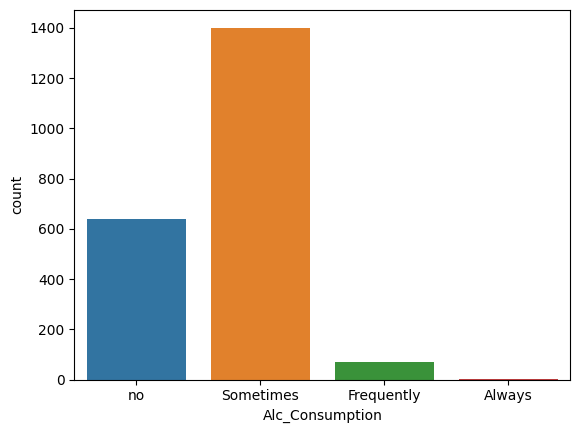

In [199]:
sns.countplot(x='Alc_Consumption', data = df)

<Axes: xlabel='High_Cal_Intake', ylabel='count'>

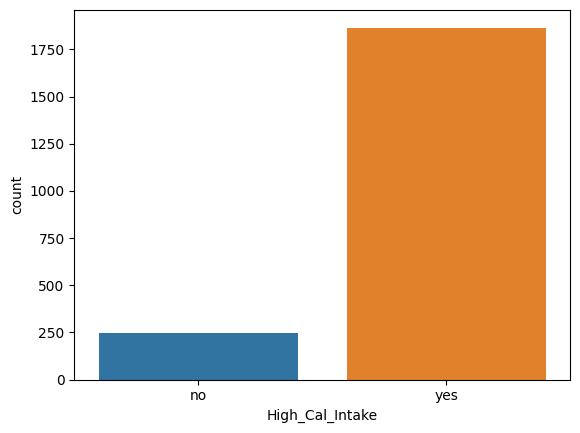

In [200]:
sns.countplot(x = 'High_Cal_Intake', data = df)

<Axes: xlabel='Veg_Consumption', ylabel='Count'>

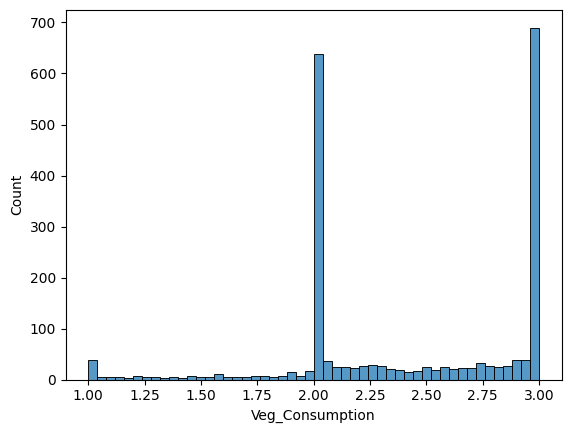

In [201]:
sns.histplot(x = 'Veg_Consumption',bins = 50, data = df)

<Axes: xlabel='Meals_Count_per_day', ylabel='Count'>

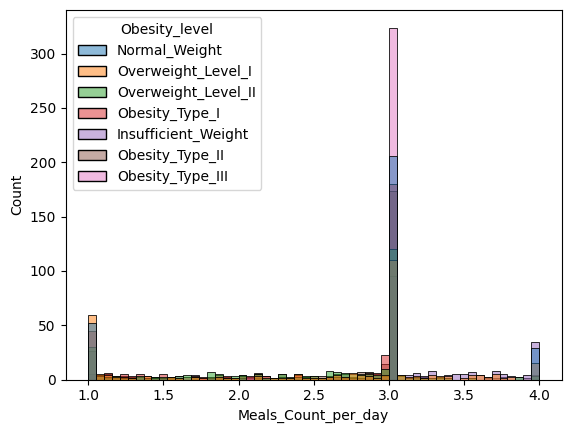

In [202]:
sns.histplot(x = 'Meals_Count_per_day',hue = 'Obesity_level', data = df)

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()

In [205]:
a  = num_col[['Age']]
a

,Age
0,21.000000
1,21.000000
2,23.000000
3,27.000000
4,22.000000
...,...
2106,20.976842
2107,21.982942
2108,22.524036
2109,24.361936


In [206]:
scaled_num = scaler.fit_transform(num_col.iloc[:,1:])
scaled_num

array([[-0.87558934, -0.86255819, -0.7850187 , ..., -0.01307326,
        -1.18803911,  0.56199675],
       [-1.94759928, -1.16807699,  1.08834176, ...,  1.61875854,
         2.33975012, -1.08062463],
       [ 1.05402854, -0.36609013, -0.7850187 , ..., -0.01307326,
         1.16382038,  0.56199675],
       ...,
       [ 0.54167211,  1.79886776,  1.08834176, ...,  0.0753606 ,
         0.47497132, -0.01901815],
       [ 0.40492652,  1.78577968,  1.08834176, ...,  1.37780063,
         0.15147069, -0.11799101],
       [ 0.39834438,  1.7905916 ,  1.08834176, ...,  1.39603472,
         0.01899633,  0.09243207]])

In [207]:
num_col.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consumption', 'Meals_Count_per_day',
       'Water_Consumption', 'Exercise', 'Tech_Usage'],
      dtype='object')

In [208]:
scaled_num = pd.DataFrame(scaled_num, columns=['Height','Weight','Veg_Consumption','Meals_Count_per_day','Water_Consumption','Exercise','Tech_Usage'])
scaled_num

,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage
0,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...
2106,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [209]:
num = pd.concat([a,scaled_num],axis = 1)
num

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage
0,21.000000,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,21.000000,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,23.000000,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,27.000000,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,22.000000,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...
2106,20.976842,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,21.982942,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,22.524036,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,24.361936,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [210]:
num.shape

(2111, 8)

In [211]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [212]:
df.head()

,Age,Gender,Height,Weight,Alc_Consumption,High_Cal_Intake,Veg_Consumption,Meals_Count_per_day,Cal_Intake,Smoke,Water_Consumption,family_with_OverWgt,Exercise,Tech_Usage,Food_b/w_Meals,Transport_Usage,Obesity_level
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [213]:
cat_encoded=pd.get_dummies(data=cat_col.iloc[:,:-1],prefix_sep=' ',dtype='int8')
cat_encoded

,Gender Female,Gender Male,Alc_Consumption Always,Alc_Consumption Frequently,Alc_Consumption Sometimes,Alc_Consumption no,High_Cal_Intake no,High_Cal_Intake yes,Cal_Intake no,Cal_Intake yes,...,family_with_OverWgt yes,Food_b/w_Meals Always,Food_b/w_Meals Frequently,Food_b/w_Meals Sometimes,Food_b/w_Meals no,Transport_Usage Automobile,Transport_Usage Bike,Transport_Usage Motorbike,Transport_Usage Public_Transportation,Transport_Usage Walking
0,1,0,0,0,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2107,1,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2108,1,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2109,1,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
b = le.fit_transform(cat_col['Obesity_level'])
b

array([1, 1, 1, ..., 4, 4, 4])

In [215]:
b.shape

(2111,)

In [216]:
b = b.reshape(-1,1)
b

array([[1],
       [1],
       [1],
       ...,
       [4],
       [4],
       [4]])

In [217]:
b.shape

(2111, 1)

In [218]:
b = pd.DataFrame(b,columns=['Obesity_level'])
b

,Obesity_level
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


In [219]:
type(b)

pandas.core.frame.DataFrame

In [220]:
encoded_df = pd.concat([num,cat_encoded],axis = 1)
encoded_df

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage,Gender Female,Gender Male,...,family_with_OverWgt yes,Food_b/w_Meals Always,Food_b/w_Meals Frequently,Food_b/w_Meals Sometimes,Food_b/w_Meals no,Transport_Usage Automobile,Transport_Usage Bike,Transport_Usage Motorbike,Transport_Usage Public_Transportation,Transport_Usage Walking
0,21.000000,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1,0,...,1,0,0,1,0,0,0,0,1,0
1,21.000000,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0,1,...,1,0,0,1,0,0,0,0,1,0
3,27.000000,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0,1,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1,0,...,1,0,0,1,0,0,0,0,1,0
2107,21.982942,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1,0,...,1,0,0,1,0,0,0,0,1,0
2108,22.524036,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1,0,...,1,0,0,1,0,0,0,0,1,0
2109,24.361936,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1,0,...,1,0,0,1,0,0,0,0,1,0


In [221]:
type(encoded_df)

pandas.core.frame.DataFrame

In [222]:
final_df = pd.concat([encoded_df,b], axis = 1)
final_df

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage,Gender Female,Gender Male,...,Food_b/w_Meals Always,Food_b/w_Meals Frequently,Food_b/w_Meals Sometimes,Food_b/w_Meals no,Transport_Usage Automobile,Transport_Usage Bike,Transport_Usage Motorbike,Transport_Usage Public_Transportation,Transport_Usage Walking,Obesity_level
0,21.000000,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1,0,...,0,0,1,0,0,0,0,1,0,1
1,21.000000,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1,0,...,0,0,1,0,0,0,0,1,0,1
2,23.000000,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0,1,...,0,0,1,0,0,0,0,1,0,1
3,27.000000,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0,1,...,0,0,1,0,0,0,0,0,1,5
4,22.000000,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0,1,...,0,0,1,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1,0,...,0,0,1,0,0,0,0,1,0,4
2107,21.982942,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1,0,...,0,0,1,0,0,0,0,1,0,4
2108,22.524036,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1,0,...,0,0,1,0,0,0,0,1,0,4
2109,24.361936,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1,0,...,0,0,1,0,0,0,0,1,0,4


In [223]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [224]:
x

,Age,Height,Weight,Veg_Consumption,Meals_Count_per_day,Water_Consumption,Exercise,Tech_Usage,Gender Female,Gender Male,...,family_with_OverWgt yes,Food_b/w_Meals Always,Food_b/w_Meals Frequently,Food_b/w_Meals Sometimes,Food_b/w_Meals no,Transport_Usage Automobile,Transport_Usage Bike,Transport_Usage Motorbike,Transport_Usage Public_Transportation,Transport_Usage Walking
0,21.000000,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1,0,...,1,0,0,1,0,0,0,0,1,0
1,21.000000,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0,1,...,1,0,0,1,0,0,0,0,1,0
3,27.000000,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0,1,...,0,0,0,1,0,0,0,0,0,1
4,22.000000,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,1,0,...,1,0,0,1,0,0,0,0,1,0
2107,21.982942,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,1,0,...,1,0,0,1,0,0,0,0,1,0
2108,22.524036,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,1,0,...,1,0,0,1,0,0,0,0,1,0
2109,24.361936,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,1,0,...,1,0,0,1,0,0,0,0,1,0


In [225]:
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: Obesity_level, Length: 2111, dtype: int64

### ----From here the model begins----

# SVC

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 67)

In [228]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1688, 31)
(423, 31)
(1688,)
(423,)


In [229]:
from sklearn.svm import SVC

# Initialize SVC model
svc=SVC()

In [230]:
# Train SVC model
model = svc.fit(x_train,y_train)
model

SVC()

In [231]:
# Predict on test set
y_test_pred = svc.predict(x_test)
y_train_pred = svc.predict(x_train)

In [232]:
y_test_pred


array([4, 4, 2, 5, 2, 3, 4, 4, 5, 0, 2, 2, 4, 3, 2, 4, 2, 0, 0, 0, 2, 2,
       2, 3, 4, 0, 2, 5, 2, 0, 0, 4, 0, 2, 4, 2, 4, 2, 2, 3, 4, 2, 3, 4,
       3, 3, 2, 2, 3, 0, 3, 2, 0, 4, 5, 5, 3, 2, 2, 0, 3, 3, 0, 2, 0, 4,
       2, 5, 3, 2, 0, 0, 5, 4, 3, 3, 0, 0, 5, 4, 3, 3, 3, 2, 3, 4, 1, 0,
       5, 4, 3, 5, 4, 0, 3, 3, 3, 0, 1, 3, 0, 5, 1, 4, 4, 3, 2, 0, 4, 3,
       4, 0, 0, 3, 0, 2, 0, 4, 3, 2, 3, 3, 0, 0, 3, 5, 2, 1, 1, 1, 3, 3,
       2, 0, 4, 5, 2, 5, 5, 5, 3, 1, 3, 0, 5, 2, 2, 1, 5, 2, 2, 2, 0, 2,
       0, 2, 3, 5, 0, 2, 0, 0, 0, 2, 0, 4, 5, 0, 4, 2, 2, 3, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 4, 5, 3, 0, 4, 0, 0, 4, 3, 0, 0, 0, 3, 5, 1, 3, 4,
       2, 0, 3, 0, 5, 0, 4, 0, 1, 3, 0, 2, 0, 4, 2, 0, 2, 4, 0, 0, 3, 3,
       1, 0, 4, 4, 5, 2, 0, 0, 0, 2, 4, 5, 5, 3, 3, 3, 2, 3, 4, 0, 1, 2,
       3, 2, 3, 5, 4, 0, 2, 5, 4, 2, 5, 0, 2, 2, 4, 4, 3, 1, 4, 3, 3, 5,
       0, 2, 2, 0, 0, 0, 4, 0, 2, 6, 2, 4, 3, 2, 0, 0, 4, 0, 0, 4, 5, 2,
       4, 2, 3, 2, 2, 3, 5, 2, 1, 3, 2, 4, 0, 4, 0,

In [233]:
y_train_pred

array([4, 0, 0, ..., 4, 3, 2])

In [234]:
svc.fit(x_test,y_test)

SVC()

In [235]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [236]:
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred,average='macro')
recall = recall_score(y_test,y_test_pred,average='macro')
conf_matrix = confusion_matrix(y_test,y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

In [237]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6453900709219859
Precision: 0.5823406332578295
Recall: 0.6219124588220286
Confusion Matrix:
 [[48  1  2  0  0  0  0]
 [31 12  1  0  0 17  4]
 [ 4  0 56 11  1  3  0]
 [ 0  0  5 62  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 9  2 11  2  0 30  0]
 [ 9  1 25  6  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.94      0.63        51
           1       0.75      0.18      0.30        65
           2       0.56      0.75      0.64        75
           3       0.77      0.93      0.84        67
           4       0.97      1.00      0.98        65
           5       0.56      0.56      0.56        54
           6       0.00      0.00      0.00        46

    accuracy                           0.65       423
   macro avg       0.58      0.62      0.56       423
weighted avg       0.61      0.65      0.59       423



In [238]:
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred,average='micro')
recall = recall_score(y_test,y_test_pred,average='micro')
conf_matrix = confusion_matrix(y_test,y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

In [239]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6453900709219859
Precision: 0.6453900709219859
Recall: 0.6453900709219859
Confusion Matrix:
 [[48  1  2  0  0  0  0]
 [31 12  1  0  0 17  4]
 [ 4  0 56 11  1  3  0]
 [ 0  0  5 62  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 9  2 11  2  0 30  0]
 [ 9  1 25  6  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.94      0.63        51
           1       0.75      0.18      0.30        65
           2       0.56      0.75      0.64        75
           3       0.77      0.93      0.84        67
           4       0.97      1.00      0.98        65
           5       0.56      0.56      0.56        54
           6       0.00      0.00      0.00        46

    accuracy                           0.65       423
   macro avg       0.58      0.62      0.56       423
weighted avg       0.61      0.65      0.59       423



In [240]:
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred,average='weighted')
recall = recall_score(y_test,y_test_pred,average='weighted')
conf_matrix = confusion_matrix(y_test,y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

In [241]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.6453900709219859
Precision: 0.6130763022983393
Recall: 0.6453900709219859
Confusion Matrix:
 [[48  1  2  0  0  0  0]
 [31 12  1  0  0 17  4]
 [ 4  0 56 11  1  3  0]
 [ 0  0  5 62  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 9  2 11  2  0 30  0]
 [ 9  1 25  6  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.94      0.63        51
           1       0.75      0.18      0.30        65
           2       0.56      0.75      0.64        75
           3       0.77      0.93      0.84        67
           4       0.97      1.00      0.98        65
           5       0.56      0.56      0.56        54
           6       0.00      0.00      0.00        46

    accuracy                           0.65       423
   macro avg       0.58      0.62      0.56       423
weighted avg       0.61      0.65      0.59       423



In [242]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',degree = 3, C=1.0, gamma='scale')

In [243]:
y_train_pred = svc.predict(x_train)

In [244]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.4235781990521327
Precision score : 0.27427278756405576
recall score : 0.4235781990521327
f1 score : 0.32610674674314866
confusion matrix :
 [[  0 216   2   3   0   0   0]
 [  0 172  29  21   0   0   0]
 [  0  41 142  79  14   0   0]
 [  0   1  48 142  39   0   0]
 [  0   0   0   0 259   0   0]
 [  0 127  51  53   5   0   0]
 [  0  70  79  85  10   0   0]]
classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       221
           1       0.27      0.77      0.41       222
           2       0.40      0.51      0.45       276
           3       0.37      0.62      0.46       230
           4       0.79      1.00      0.88       259
           5       0.00      0.00      0.00       236
           6       0.00      0.00      0.00       244

    accuracy                           0.42      1688
   macro avg       0.26      0.42      0.32      1688
weighted avg       0.27      0.42      0.33      1688



In [245]:
y_test_pred = svc.predict(x_test)

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.5035460992907801
Precision score : 0.35356082115722104
recall score : 0.5035460992907801
f1 score : 0.407717052424951
confusion matrix :
 [[ 0 49  1  1  0  0  0]
 [ 1 52  6  5  1  0  0]
 [ 0  8 46 17  4  0  0]
 [ 0  0  9 50  8  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0 40  4 10  0  0  0]
 [ 0 12 17 15  2  0  0]]
classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.32      0.80      0.46        65
           2       0.55      0.61      0.58        75
           3       0.51      0.75      0.61        67
           4       0.81      1.00      0.90        65
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        46

    accuracy                           0.50       423
   macro avg       0.31      0.45      0.36       423
weighted avg       0.35      0.50      0.41       423



# Decision Tree

In [247]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

In [248]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)

# fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [249]:
y_train_pred = clf_gini.predict(x_train)
y_train_pred

array([2, 3, 5, ..., 0, 2, 1])

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :', cls_rep)


Accuracy score : 0.9170616113744076
Precision score : 0.928027981366913
recall score : 0.9170616113744076
f1 score : 0.9177845705336304
confusion matrix : [[216   3   0   0   0   0   0]
 [  6 159   0   0   0  58   0]
 [  0   0 272   0   0   3   2]
 [  0   0   3 242   0   0   0]
 [  0   0   0   0 253   0   0]
 [  0  13   0   0   0 225   5]
 [  0   4   5   0   0  38 181]]
classification report :               precision    recall  f1-score   support

           0       0.97      0.99      0.98       219
           1       0.89      0.71      0.79       223
           2       0.97      0.98      0.98       277
           3       1.00      0.99      0.99       245
           4       1.00      1.00      1.00       253
           5       0.69      0.93      0.79       243
           6       0.96      0.79      0.87       228

    accuracy                           0.92      1688
   macro avg       0.93      0.91      0.91      1688
weighted avg       0.93      0.92      0.92      1688



## Train accuracy for Decision tree is 0.91

In [251]:
y_test_pred = clf_gini.predict(x_test)
y_test_pred

array([3, 4, 4, 1, 5, 5, 3, 0, 1, 2, 2, 2, 2, 4, 1, 4, 4, 2, 6, 6, 4, 2,
       0, 2, 0, 5, 4, 3, 5, 4, 6, 5, 4, 1, 5, 3, 5, 5, 0, 2, 5, 3, 1, 1,
       3, 5, 0, 4, 5, 2, 5, 2, 4, 2, 4, 5, 3, 5, 5, 4, 6, 6, 6, 6, 2, 5,
       3, 6, 6, 5, 4, 4, 0, 5, 4, 3, 3, 0, 2, 0, 6, 3, 3, 1, 0, 2, 0, 0,
       0, 2, 6, 4, 1, 3, 1, 2, 4, 0, 5, 0, 5, 1, 3, 2, 2, 5, 4, 3, 4, 6,
       6, 0, 5, 4, 0, 6, 2, 2, 0, 2, 5, 5, 6, 2, 5, 3, 3, 5, 0, 5, 3, 2,
       2, 0, 6, 2, 2, 4, 5, 1, 1, 2, 4, 2, 5, 1, 3, 3, 2, 5, 2, 4, 2, 6,
       4, 4, 5, 1, 6, 1, 1, 1, 5, 0, 1, 6, 2, 1, 0, 2, 2, 1, 0, 3, 6, 4,
       5, 4, 3, 0, 1, 6, 6, 4, 3, 3, 4, 4, 0, 3, 5, 0, 4, 6, 3, 3, 3, 0,
       1, 2, 4, 1, 1, 2, 0, 1, 3, 4, 5, 5, 0, 1, 2, 5, 5, 6, 4, 2, 2, 1,
       5, 0, 6, 3, 0, 2, 2, 3, 5, 6, 4, 6, 4, 4, 3, 6, 0, 6, 3, 1, 5, 4,
       3, 3, 4, 4, 2, 6, 5, 4, 5, 4, 5, 1, 4, 0, 2, 1, 5, 1, 0, 0, 2, 4,
       1, 3, 4, 2, 2, 3, 5, 3, 2, 4, 2, 3, 1, 0, 4, 5, 2, 4, 4, 2, 0, 0,
       4, 4, 5, 2, 5, 2, 1, 2, 5, 4, 2, 6, 6, 6, 0,

In [252]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\t\n', cls_rep)


Accuracy score : 0.9078014184397163
Precision score : 0.9349083039959794
recall score : 0.9078014184397163
f1 score : 0.9122201736363901
confusion matrix :
 [[53  0  0  0  0  0  0]
 [ 0 48  0  0  0 16  0]
 [ 0  0 72  1  0  1  0]
 [ 0  0  2 50  0  0  0]
 [ 0  0  0  0 71  0  0]
 [ 0  3  0  0  0 44  0]
 [ 0  0  1  0  0 15 46]]
classification report :	
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.75      0.83        64
           2       0.96      0.97      0.97        74
           3       0.98      0.96      0.97        52
           4       1.00      1.00      1.00        71
           5       0.58      0.94      0.72        47
           6       1.00      0.74      0.85        62

    accuracy                           0.91       423
   macro avg       0.92      0.91      0.91       423
weighted avg       0.93      0.91      0.91       423



## Test Accuracy for Decison Tree is 0.90

## Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

In [254]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22,random_state = 69)

In [255]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [256]:
y_train_pred = log_reg.predict(x_train)
y_train_pred

array([5, 5, 5, ..., 5, 0, 3])

In [257]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('Recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('Confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('Classification report :\n', cls_rep)


Accuracy score : 0.8705953827460511
Precision score : 0.8704016717439691
Recall score : 0.8705953827460511
f1 score : 0.8689219744445621
Confusion matrix :
 [[207   5   0   0   0   0   0]
 [ 34 150   0   0   0  24  12]
 [  0   1 244  14   3   2  13]
 [  0   0   2 234   0   0   0]
 [  0   0   0   1 241   0   0]
 [  0  23   0   0   0 183  30]
 [  0   6  11   0   1  31 174]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       212
           1       0.81      0.68      0.74       220
           2       0.95      0.88      0.91       277
           3       0.94      0.99      0.96       236
           4       0.98      1.00      0.99       242
           5       0.76      0.78      0.77       236
           6       0.76      0.78      0.77       223

    accuracy                           0.87      1646
   macro avg       0.87      0.87      0.87      1646
weighted avg       0.87      0.87      0.87      1646



## Training accuracy is 0.87

In [258]:
y_test_pred = log_reg.predict(x_test)
y_test_pred

array([4, 4, 0, 4, 2, 2, 3, 1, 2, 5, 2, 5, 6, 2, 5, 0, 4, 2, 0, 5, 2, 0,
       0, 4, 5, 4, 5, 4, 1, 1, 5, 0, 0, 5, 1, 4, 3, 3, 6, 3, 1, 3, 6, 2,
       6, 1, 3, 1, 6, 1, 5, 6, 0, 6, 3, 3, 4, 0, 1, 6, 0, 4, 2, 4, 3, 0,
       5, 4, 5, 3, 4, 5, 2, 6, 2, 4, 4, 4, 3, 4, 4, 5, 1, 1, 0, 1, 4, 4,
       4, 4, 2, 0, 2, 6, 2, 6, 6, 6, 4, 1, 4, 6, 2, 1, 4, 5, 2, 0, 4, 5,
       4, 0, 5, 2, 0, 0, 3, 0, 0, 5, 0, 4, 6, 0, 2, 3, 2, 1, 0, 4, 2, 1,
       5, 4, 4, 0, 4, 0, 0, 6, 2, 5, 6, 5, 6, 6, 3, 6, 1, 2, 6, 3, 5, 5,
       2, 2, 5, 4, 6, 4, 3, 3, 4, 0, 2, 0, 3, 6, 1, 0, 2, 6, 5, 3, 6, 1,
       5, 1, 1, 3, 0, 3, 5, 1, 3, 4, 4, 2, 6, 5, 2, 4, 0, 6, 3, 3, 2, 0,
       4, 4, 2, 1, 3, 5, 3, 3, 6, 6, 1, 0, 4, 4, 2, 5, 3, 6, 2, 0, 6, 0,
       2, 0, 5, 3, 3, 3, 3, 0, 2, 1, 6, 5, 5, 5, 0, 5, 6, 5, 5, 6, 2, 2,
       4, 5, 3, 1, 0, 2, 4, 4, 1, 5, 2, 0, 3, 5, 4, 3, 4, 4, 4, 3, 5, 0,
       2, 4, 1, 3, 5, 6, 5, 5, 4, 5, 2, 2, 6, 0, 4, 4, 5, 2, 4, 6, 6, 3,
       3, 2, 0, 5, 3, 3, 0, 0, 4, 5, 3, 0, 5, 2, 1,

In [259]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)


Accuracy score : 0.8580645161290322
Precision score : 0.8628281856695018
recall score : 0.8580645161290322
f1 score : 0.8563452175813105
confusion matrix :
 [[58  2  0  0  0  0  0]
 [10 45  0  0  0  7  5]
 [ 0  0 64  7  0  1  2]
 [ 0  0  1 60  0  0  0]
 [ 0  0  0  0 82  0  0]
 [ 0  2  0  0  0 43  9]
 [ 0  1  4  1  1 13 47]]
classification report :
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        60
           1       0.90      0.67      0.77        67
           2       0.93      0.86      0.90        74
           3       0.88      0.98      0.93        61
           4       0.99      1.00      0.99        82
           5       0.67      0.80      0.73        54
           6       0.75      0.70      0.72        67

    accuracy                           0.86       465
   macro avg       0.85      0.85      0.85       465
weighted avg       0.86      0.86      0.86       465



## Testing accuracy for Logistic Regression is 0.85

# Random Forest

In [260]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22,random_state = 6)

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=8,random_state=97)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=8, random_state=97)

In [262]:
y_train_pred = rf.predict(x_train)
y_train_pred

array([4, 3, 2, ..., 0, 4, 1])

In [263]:
y_test_pred = rf.predict(x_test)
y_test_pred


array([4, 4, 2, 3, 4, 0, 0, 4, 2, 4, 4, 6, 1, 2, 2, 6, 4, 4, 0, 1, 5, 6,
       4, 3, 5, 6, 4, 0, 0, 2, 1, 2, 5, 1, 6, 2, 5, 6, 3, 6, 5, 2, 0, 5,
       3, 4, 0, 6, 3, 3, 3, 0, 6, 1, 3, 0, 1, 4, 3, 3, 5, 1, 2, 4, 2, 5,
       2, 4, 1, 2, 5, 3, 5, 5, 1, 1, 1, 6, 5, 0, 4, 1, 3, 2, 0, 1, 6, 1,
       2, 5, 0, 2, 4, 2, 1, 5, 1, 6, 0, 4, 2, 2, 0, 2, 2, 4, 3, 0, 5, 1,
       1, 6, 5, 0, 6, 4, 2, 5, 1, 4, 3, 1, 1, 2, 5, 2, 2, 6, 4, 6, 1, 0,
       4, 2, 0, 3, 3, 4, 0, 2, 6, 5, 3, 6, 4, 5, 1, 3, 5, 4, 5, 6, 1, 0,
       6, 6, 6, 2, 6, 3, 4, 3, 3, 0, 5, 4, 5, 3, 0, 2, 4, 4, 0, 2, 4, 6,
       5, 6, 2, 5, 1, 3, 1, 4, 5, 0, 0, 6, 2, 0, 3, 2, 5, 5, 2, 3, 5, 6,
       4, 2, 3, 0, 5, 6, 5, 5, 4, 5, 2, 1, 4, 5, 6, 1, 5, 4, 5, 0, 6, 5,
       6, 0, 1, 3, 4, 5, 1, 4, 2, 1, 5, 6, 2, 2, 1, 3, 3, 5, 0, 1, 5, 5,
       3, 5, 2, 6, 3, 6, 0, 2, 6, 3, 3, 2, 6, 1, 6, 2, 5, 5, 1, 0, 0, 1,
       4, 4, 1, 2, 2, 5, 4, 5, 4, 1, 2, 5, 3, 5, 4, 5, 1, 0, 6, 1, 3, 0,
       5, 3, 3, 4, 3, 3, 6, 2, 1, 4, 0, 6, 1, 1, 2,

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.996962332928311
Precision score : 0.9969761289784613
recall score : 0.996962332928311
f1 score : 0.9969649756986928
confusion matrix :
 [[210   1   0   0   0   0   0]
 [  2 223   0   0   0   0   0]
 [  0   0 280   0   0   0   0]
 [  0   0   0 236   0   0   0]
 [  0   0   0   0 250   0   0]
 [  0   2   0   0   0 210   0]
 [  0   0   0   0   0   0 232]]
classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       0.99      0.99      0.99       225
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       236
           4       1.00      1.00      1.00       250
           5       1.00      0.99      1.00       212
           6       1.00      1.00      1.00       232

    accuracy                           1.00      1646
   macro avg       1.00      1.00      1.00      1646
weighted avg       1.00      1.00      1.00      1646



## Train accuracy for Random Forest is 0.99

In [265]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)


Accuracy score : 0.9182795698924732
Precision score : 0.9193549836190448
recall score : 0.9182795698924732
f1 score : 0.9185266240885037
confusion matrix :
 [[57  4  0  0  0  0  0]
 [ 2 48  0  0  0  5  7]
 [ 0  1 69  0  0  0  1]
 [ 0  0  1 60  0  0  0]
 [ 0  0  1  0 73  0  0]
 [ 0  7  1  0  0 68  2]
 [ 0  2  2  0  0  2 52]]
classification report :
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.77      0.77      0.77        62
           2       0.93      0.97      0.95        71
           3       1.00      0.98      0.99        61
           4       1.00      0.99      0.99        74
           5       0.91      0.87      0.89        78
           6       0.84      0.90      0.87        58

    accuracy                           0.92       465
   macro avg       0.92      0.92      0.92       465
weighted avg       0.92      0.92      0.92       465



## Test Accuracy for Random Forest is 0.91

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.9182795698924732
Precision score : 0.9193549836190448
recall score : 0.9182795698924732
f1 score : 0.9185266240885037
confusion matrix :
 [[57  4  0  0  0  0  0]
 [ 2 48  0  0  0  5  7]
 [ 0  1 69  0  0  0  1]
 [ 0  0  1 60  0  0  0]
 [ 0  0  1  0 73  0  0]
 [ 0  7  1  0  0 68  2]
 [ 0  2  2  0  0  2 52]]
classification report :
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.77      0.77      0.77        62
           2       0.93      0.97      0.95        71
           3       1.00      0.98      0.99        61
           4       1.00      0.99      0.99        74
           5       0.91      0.87      0.89        78
           6       0.84      0.90      0.87        58

    accuracy                           0.92       465
   macro avg       0.92      0.92      0.92       465
weighted avg       0.92      0.92      0.92       465



# XGBOOST

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.23, random_state = 18)

In [268]:
from xgboost import XGBClassifier
xgb = XGBClassifier(maxdepth=4,learning_rate=0.01,n_estimators=100)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [269]:
y_train_pred = xgb.predict(x_train)
y_train_pred

array([5, 6, 3, ..., 3, 6, 1])

In [270]:
y_test_pred = xgb.predict(x_test)
y_test_pred

array([5, 4, 2, 1, 6, 4, 4, 4, 4, 3, 5, 3, 3, 4, 0, 2, 4, 6, 1, 2, 5, 1,
       6, 4, 1, 1, 1, 6, 4, 2, 1, 3, 6, 4, 2, 0, 5, 2, 2, 6, 6, 0, 5, 3,
       1, 6, 4, 6, 3, 3, 4, 2, 4, 2, 3, 4, 5, 2, 6, 6, 5, 4, 3, 1, 5, 5,
       6, 3, 3, 6, 0, 1, 3, 4, 3, 5, 1, 4, 1, 3, 2, 6, 5, 2, 2, 4, 6, 3,
       0, 1, 4, 3, 2, 6, 2, 3, 2, 3, 1, 5, 6, 5, 2, 0, 4, 4, 3, 5, 6, 3,
       1, 2, 4, 0, 3, 2, 0, 2, 6, 0, 0, 3, 1, 6, 5, 0, 5, 5, 4, 3, 1, 5,
       3, 3, 5, 5, 2, 6, 6, 2, 3, 3, 3, 4, 0, 2, 4, 3, 5, 6, 2, 4, 0, 2,
       0, 4, 3, 1, 2, 3, 2, 6, 2, 4, 6, 4, 1, 6, 1, 6, 1, 5, 4, 5, 1, 5,
       1, 3, 6, 3, 6, 6, 2, 0, 6, 3, 3, 1, 4, 0, 0, 5, 5, 4, 6, 5, 6, 4,
       1, 6, 4, 6, 0, 2, 2, 3, 4, 5, 2, 3, 4, 3, 4, 2, 1, 1, 1, 1, 3, 2,
       0, 2, 6, 1, 4, 3, 3, 4, 1, 5, 4, 4, 0, 1, 6, 0, 2, 0, 0, 1, 6, 4,
       2, 3, 1, 5, 5, 1, 5, 6, 5, 1, 6, 0, 3, 0, 0, 3, 2, 0, 5, 6, 2, 4,
       2, 1, 3, 6, 5, 6, 2, 3, 4, 6, 2, 1, 2, 0, 3, 4, 6, 3, 1, 2, 5, 3,
       2, 0, 0, 0, 3, 3, 4, 3, 0, 5, 2, 0, 1, 1, 0,

In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.9716923076923077
Precision score : 0.9717611844089514
recall score : 0.9716923076923077
f1 score : 0.9717088639024544
confusion matrix :
 [[214   3   0   0   0   0   0]
 [  2 219   0   0   0   6   1]
 [  0   0 270   1   0   1   3]
 [  0   0   1 217   0   0   1]
 [  0   0   0   1 244   0   0]
 [  0   8   0   0   0 214   7]
 [  0   2   4   0   0   5 201]]
classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       217
           1       0.94      0.96      0.95       228
           2       0.98      0.98      0.98       275
           3       0.99      0.99      0.99       219
           4       1.00      1.00      1.00       245
           5       0.95      0.93      0.94       229
           6       0.94      0.95      0.95       212

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



## Train accuracy for XGBOOST is 0.97

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.9382716049382716
Precision score : 0.9411352047056046
recall score : 0.9382716049382716
f1 score : 0.9386958946722562
confusion matrix :
 [[51  4  0  0  0  0  0]
 [ 1 55  0  0  0  3  0]
 [ 0  0 75  0  0  0  1]
 [ 0  0  2 76  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  8  0  0  0 51  2]
 [ 0  1  3  0  0  5 69]]
classification report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.81      0.93      0.87        59
           2       0.94      0.99      0.96        76
           3       1.00      0.97      0.99        78
           4       1.00      1.00      1.00        79
           5       0.86      0.84      0.85        61
           6       0.96      0.88      0.92        78

    accuracy                           0.94       486
   macro avg       0.94      0.93      0.93       486
weighted avg       0.94      0.94      0.94       486



## Test accuracy for XGBOOST is 0.93

# ADABOOST

In [273]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.23, random_state = 8,stratify=y)

In [274]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=100,learning_rate=100,random_state=40)
ab.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=100, n_estimators=100, random_state=40)

In [275]:
y_train_pred = ab.predict(x_train)
y_train_pred

array([3, 6, 3, ..., 4, 6, 6])

In [276]:
y_test_pred = ab.predict(x_test)
y_test_pred

array([3, 4, 0, 6, 6, 3, 3, 6, 0, 4, 4, 6, 0, 6, 3, 6, 6, 6, 6, 4, 0, 4,
       0, 3, 0, 6, 6, 6, 6, 4, 0, 6, 0, 6, 6, 4, 6, 6, 4, 0, 6, 0, 3, 6,
       0, 4, 6, 6, 4, 4, 0, 3, 0, 0, 0, 4, 4, 6, 3, 4, 6, 1, 6, 6, 4, 6,
       4, 6, 3, 0, 1, 6, 4, 6, 4, 6, 0, 0, 3, 0, 0, 0, 6, 6, 6, 6, 4, 6,
       1, 6, 4, 4, 0, 1, 4, 6, 4, 4, 3, 4, 0, 6, 1, 0, 6, 4, 6, 6, 4, 6,
       0, 0, 6, 6, 4, 4, 6, 6, 0, 3, 6, 4, 4, 0, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 0, 6, 4, 6, 0, 0, 4, 0, 6, 6, 0, 6, 6, 3, 4, 6, 6, 0,
       3, 6, 3, 6, 3, 0, 6, 6, 6, 6, 6, 4, 6, 4, 6, 0, 4, 6, 6, 6, 6, 4,
       6, 6, 6, 4, 0, 6, 3, 6, 6, 3, 0, 6, 0, 6, 4, 6, 6, 3, 6, 0, 6, 0,
       6, 6, 4, 3, 0, 6, 0, 6, 6, 3, 6, 6, 4, 4, 6, 4, 0, 4, 6, 6, 6, 6,
       4, 4, 6, 3, 0, 6, 6, 0, 0, 3, 4, 0, 1, 6, 3, 0, 0, 6, 0, 6, 4, 0,
       6, 6, 4, 4, 6, 6, 6, 4, 6, 6, 0, 6, 0, 3, 6, 4, 6, 4, 0, 6, 6, 6,
       0, 0, 6, 6, 6, 6, 4, 4, 6, 1, 6, 6, 0, 6, 4, 6, 0, 0, 6, 6, 1, 6,
       6, 4, 6, 6, 6, 6, 0, 6, 6, 6, 4, 4, 6, 3, 6,

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_train, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_train, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_train, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_train, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_train, y_train_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_train, y_train_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.5156923076923077
Precision score : 0.48783367292744634
recall score : 0.5156923076923077
f1 score : 0.4262606788160921
confusion matrix :
 [[204   1   0   0   0   0   4]
 [104  22   0   0   0   0  95]
 [  0   1   0  28  13   0 228]
 [  0   0   0 144  14   0  71]
 [  0   0   0   3 247   0   0]
 [ 12   2   0   0   0   0 209]
 [  2   0   0   0   0   0 221]]
classification report :
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       209
           1       0.85      0.10      0.18       221
           2       0.00      0.00      0.00       270
           3       0.82      0.63      0.71       229
           4       0.90      0.99      0.94       250
           5       0.00      0.00      0.00       223
           6       0.27      0.99      0.42       223

    accuracy                           0.52      1625
   macro avg       0.50      0.53      0.43      1625
weighted avg       0.49      0.52      0.43      1625



## Train accuracy for ADABOOST is 0.51

In [278]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(y_test, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(y_test, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(y_test, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(y_test, y_test_pred)
print('confusion matrix :\n', con_mat)
cls_rep = classification_report(y_test, y_test_pred)
print('classification report :\n', cls_rep)

Accuracy score : 0.5185185185185185
Precision score : 0.4515294185423864
recall score : 0.5185185185185185
f1 score : 0.4313311738415617
confusion matrix :
 [[62  1  0  0  0  0  0]
 [33  7  0  0  0  0 26]
 [ 0  2  0  8  1  0 70]
 [ 0  0  0 45  4  0 19]
 [ 0  0  0  0 74  0  0]
 [ 4  1  0  0  0  0 62]
 [ 1  2  0  0  0  0 64]]
classification report :
               precision    recall  f1-score   support

           0       0.62      0.98      0.76        63
           1       0.54      0.11      0.18        66
           2       0.00      0.00      0.00        81
           3       0.85      0.66      0.74        68
           4       0.94      1.00      0.97        74
           5       0.00      0.00      0.00        67
           6       0.27      0.96      0.42        67

    accuracy                           0.52       486
   macro avg       0.46      0.53      0.44       486
weighted avg       0.45      0.52      0.43       486



### Test accuracy for ADABOOST is 0.51

In [279]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


# Create AdaBoost classifier
ada_boost = AdaBoostClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [25,50,100,150,300],
    'learning_rate': [1e-10,1e-7,1e-4,1e-3,0.0002,0.001,0.01,0.05, 0.1, 1.0,5.0,10.0,100.0]
}

# Perform grid search with 'n'-fold cross-validation
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=7, scoring='accuracy')
grid_search.fit(x, y)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.001, 'n_estimators': 50}
Best Score: 0.417336409382789
Cross-Validation Scores: [0.47044917 0.39099526 0.40521327 0.4478673  0.36018957]
Mean CV Score: 0.4149429150840868
